In [14]:
import gym
import shinrl as srl
import seaborn as sns
import numpy as np
from shinrl import DiscreteViSolver
import matplotlib.pyplot as plt

# ShinEnv

## Value Iteration (Dynamic Programming)

In [40]:
env = gym.make("ShinPendulum-v0")
env.reset()

config = DiscreteViSolver.DefaultConfig(
    approx="tabular",
    explore="oracle",
    eval_interval=1,
    add_interval=1,
    steps_per_epoch=20,
    verbose=False,
)
mixins = DiscreteViSolver.make_mixins(env, config)
solver = DiscreteViSolver.factory(env, config, mixins)

In [41]:
solver.run()

Epoch 0: 100%|█████████████████████| 20/20 [00:00<00:00, 307.57it/s]


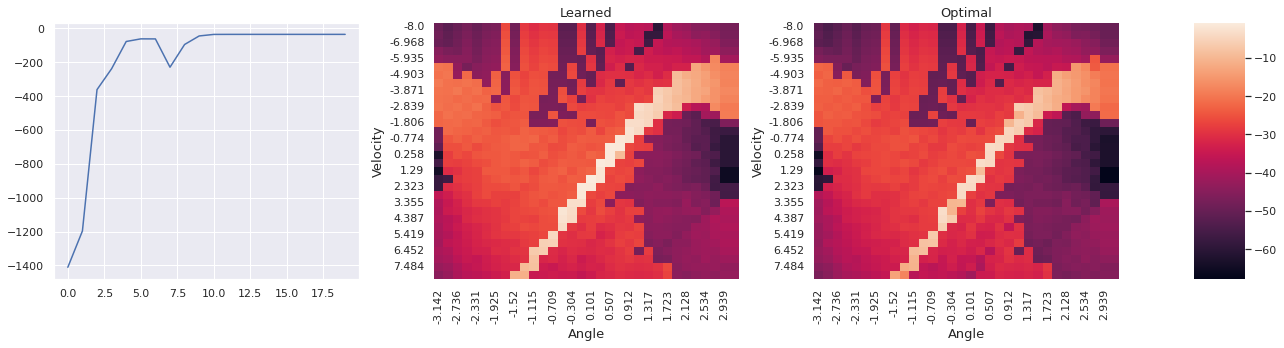

In [42]:
sns.set(font_scale=1.0)
grid_kws = {"width_ratios": (0.3, 0.3, 0.3, 0.05)}
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 5), gridspec_kw=grid_kws)

axes[0].plot(solver.scalars["Return"]["x"], solver.scalars["Return"]["y"])

learned = solver.data["Q"][:, 0]
optimal = env.calc_optimal_q()[:, 0]
_max, _min = np.maximum(learned, optimal).max(), np.minimum(learned, optimal).min()
env.plot_S(learned, ax=axes[1], cbar_ax=axes[3], title="Learned", fontsize=13, vmin=_min, vmax=_max)
env.plot_S(optimal, ax=axes[2], cbar_ax=axes[3], title="Optimal", fontsize=13, vmin=_min, vmax=_max)
plt.tight_layout()

## Tabular Q-learning

In [43]:
env = gym.make("ShinPendulum-v0")
env.reset()

config = DiscreteViSolver.DefaultConfig(
    approx="tabular",
    explore="eps_greedy",
    eval_interval=1,
    add_interval=1,
    steps_per_epoch=30000,
    eps_end=0.5,
    eps_decay=3000,
    lr=0.3,
    verbose=False,
)
mixins = DiscreteViSolver.make_mixins(env, config)
solver = DiscreteViSolver.factory(env, config, mixins)

In [44]:
solver.run()

Epoch 0:   0%|                            | 0/30000 [00:00<?, ?it/s]/home/rl-dqn/miniconda3/envs/shinrl-jax/lib/python3.8/site-packages/jax/_src/numpy/lax_numpy.py:6461: UserWarning: Explicitly requested dtype <class 'jax._src.numpy.lax_numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax._check_user_dtype_supported(dtype, "astype")
Epoch 0: 100%|███████████████| 30000/30000 [02:09<00:00, 231.44it/s]


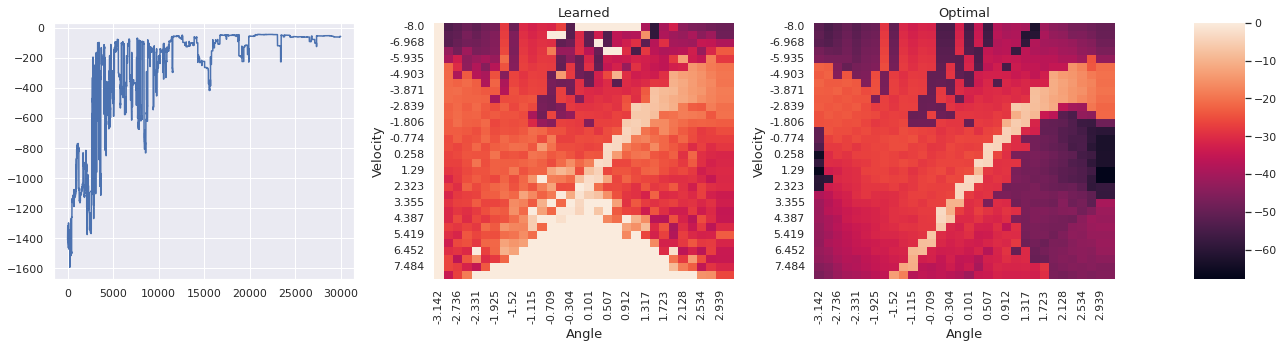

In [45]:
sns.set(font_scale=1.0)
grid_kws = {"width_ratios": (0.3, 0.3, 0.3, 0.05)}
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 5), gridspec_kw=grid_kws)

axes[0].plot(solver.scalars["Return"]["x"], solver.scalars["Return"]["y"])

learned = solver.data["Q"][:, 0]
optimal = env.calc_optimal_q()[:, 0]
_max, _min = np.maximum(learned, optimal).max(), np.minimum(learned, optimal).min()
env.plot_S(learned, ax=axes[1], cbar_ax=axes[3], title="Learned", fontsize=13, vmin=_min, vmax=_max)
env.plot_S(optimal, ax=axes[2], cbar_ax=axes[3], title="Optimal", fontsize=13, vmin=_min, vmax=_max)
plt.tight_layout()

## Deep VI (Dynamic Programming + NN approximation)

In [46]:
env = gym.make("ShinPendulum-v0")
env.reset()

config = DiscreteViSolver.DefaultConfig(
    approx="nn",
    explore="oracle",
    eval_interval=1,
    add_interval=1,
    steps_per_epoch=3000,
    target_update_interval=100,
    verbose=False,
)
mixins = DiscreteViSolver.make_mixins(env, config)
solver = DiscreteViSolver.factory(env, config, mixins)

In [47]:
solver.run()

Epoch 0: 100%|█████████████████| 3000/3000 [00:15<00:00, 188.25it/s]


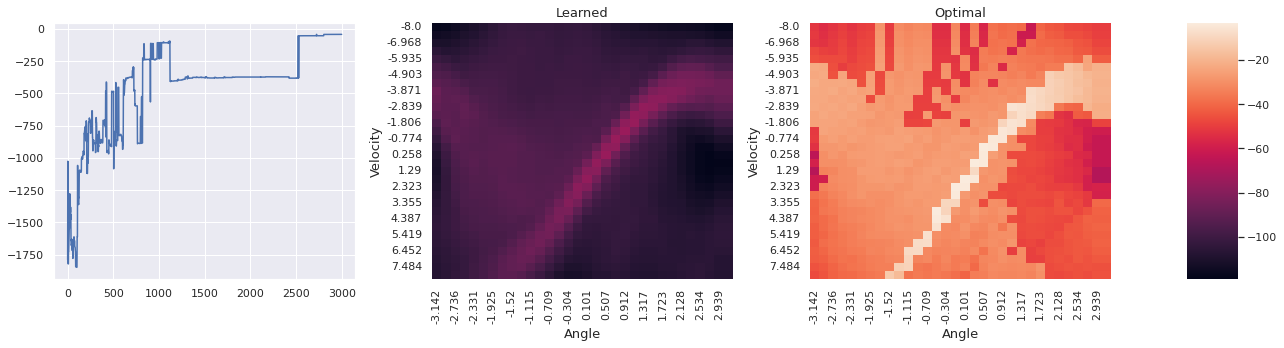

In [48]:
sns.set(font_scale=1.0)
grid_kws = {"width_ratios": (0.3, 0.3, 0.3, 0.05)}
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 5), gridspec_kw=grid_kws)

axes[0].plot(solver.scalars["Return"]["x"], solver.scalars["Return"]["y"])

learned = solver.data["Q"][:, 0]
optimal = env.calc_optimal_q()[:, 0]
_max, _min = np.maximum(learned, optimal).max(), np.minimum(learned, optimal).min()
env.plot_S(learned, ax=axes[1], cbar_ax=axes[3], title="Learned", fontsize=13, vmin=_min, vmax=_max)
env.plot_S(optimal, ax=axes[2], cbar_ax=axes[3], title="Optimal", fontsize=13, vmin=_min, vmax=_max)
plt.tight_layout()

## Deep Q learning

In [49]:
env = gym.make("ShinPendulum-v0")
env.reset()

config = DiscreteViSolver.DefaultConfig(
    approx="nn",
    explore="eps_greedy",
    eval_interval=100,
    add_interval=1,
    steps_per_epoch=30000,
    eps_end=0.5,
    eps_decay=3000,
    target_update_interval=100,
    verbose=False,
)
mixins = DiscreteViSolver.make_mixins(env, config)
solver = DiscreteViSolver.factory(env, config, mixins)

In [50]:
solver.run()

Epoch 0: 100%|███████████████| 30000/30000 [00:34<00:00, 880.03it/s]


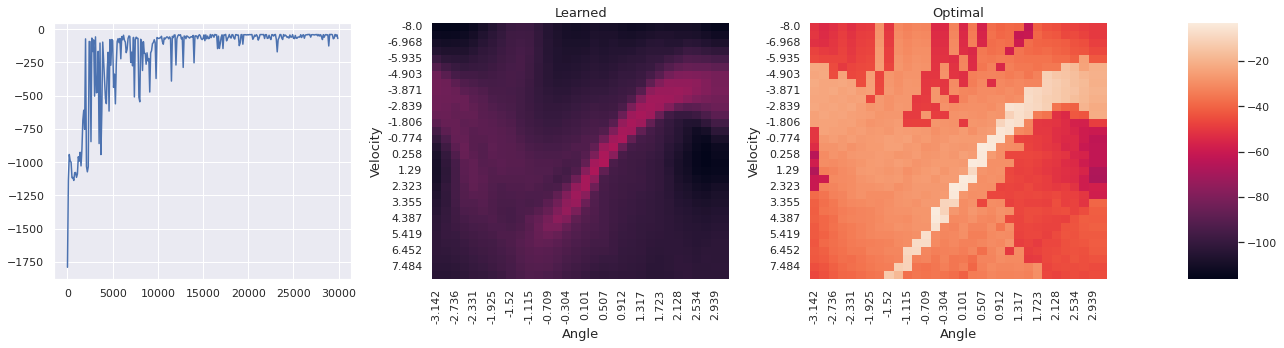

In [51]:
sns.set(font_scale=1.0)
grid_kws = {"width_ratios": (0.3, 0.3, 0.3, 0.05)}
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 5), gridspec_kw=grid_kws)

axes[0].plot(solver.scalars["Return"]["x"], solver.scalars["Return"]["y"])

learned = solver.data["Q"][:, 0]
optimal = env.calc_optimal_q()[:, 0]
_max, _min = np.maximum(learned, optimal).max(), np.minimum(learned, optimal).min()
env.plot_S(learned, ax=axes[1], cbar_ax=axes[3], title="Learned", fontsize=13, vmin=_min, vmax=_max)
env.plot_S(optimal, ax=axes[2], cbar_ax=axes[3], title="Optimal", fontsize=13, vmin=_min, vmax=_max)
plt.tight_layout()

# MinAtar

You need to install MinAtar environment.
See https://github.com/kenjyoung/MinAtar .

In [57]:
import shinrl

env = shinrl.make_minatar("breakout")
env.reset()
eval_env = shinrl.make_minatar("breakout")
eval_env.reset()

config = srl.DiscreteViSolver.DefaultConfig(
    add_interval=10,
    eval_interval=1000,
    steps_per_epoch=100000,
    approx="nn",
    explore="eps_greedy",
    evaluate="greedy",
    num_samples=4,
    eps_end=0.1,
    eps_decay=10**5,
    eps_warmup=5000,
    logp_clip=-1,
    lr=2.5*1e-4,
    batch_size=32,
    buffer_size=1e5,
    optimizer="rmsprop",
    target_update_interval=1000,
    loss_fn="huber_loss",
    verbose=False,
)
mixins = DiscreteViSolver.make_mixins(env, config)
solver = DiscreteViSolver.factory(env, config, mixins)
solver.set_eval_env(eval_env)

In [58]:
solver.run()

Epoch 0: 100%|█████████████| 100000/100000 [02:40<00:00, 623.06it/s]


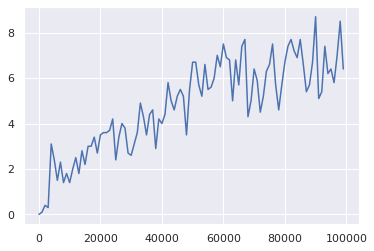

In [59]:
sns.set(font_scale=1.0)
plt.plot(solver.scalars["Return"]["x"], solver.scalars["Return"]["y"])